In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score

In [2]:
import io
%cd "C:\Users\sadin\Desktop\IMARTICUS\PYTHON\MY DATA SETS\SALES EXCELLENCE"

C:\Users\sadin\Desktop\IMARTICUS\PYTHON\MY DATA SETS\SALES EXCELLENCE


In [3]:
sales_train=pd.read_csv("train.csv")
sales_test=pd.read_csv("test.csv")

# EXPLORING DATA

In [4]:
print(sales_test.info())
print(sales_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30037 entries, 0 to 30036
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   30037 non-null  object 
 1   Gender                               30037 non-null  object 
 2   DOB                                  30034 non-null  object 
 3   Lead_Creation_Date                   30037 non-null  object 
 4   City_Code                            29723 non-null  object 
 5   City_Category                        29723 non-null  object 
 6   Employer_Code                        28432 non-null  object 
 7   Employer_Category1                   28432 non-null  object 
 8   Employer_Category2                   28342 non-null  float64
 9   Monthly_Income                       30037 non-null  float64
 10  Customer_Existing_Primary_Bank_Code  26000 non-null  object 
 11  Primary_Bank_Type           

In [5]:
print(sales_test.shape)
print(sales_train.shape)

(30037, 21)
(69713, 22)


In [6]:
sales_test.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1
0,APPA70109647212,Male,03/06/88,05/07/16,C10028,C,COM0002222,A,4.0,2150.0,...,P,Y,S122,B,0.0,10000.0,3.0,20.0,372.0,4
1,APPB10687939341,Male,13/07/81,01/07/16,C10003,A,COM0001784,C,4.0,4200.0,...,P,Y,S133,C,0.0,69000.0,5.0,24.0,1985.0,7
2,APPC80449411414,Female,19/11/90,01/07/16,C10009,B,COM0045260,B,4.0,1000.0,...,P,N,S133,B,0.0,NaN,NaN,NaN,NaN,0
3,APPD30665094501,Female,15/10/92,01/07/16,C10005,A,COM0000085,A,3.0,1465.0,...,P,N,S133,C,0.0,NaN,NaN,NaN,NaN,0
4,APPE80379821637,Male,21/09/88,01/07/16,C10005,A,COM0006422,A,4.0,2340.0,...,P,Y,S143,B,500.0,10000.0,2.0,NaN,NaN,0


In [7]:
sales_train.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,07/12/86,04/07/16,C10003,A,COM0000002,C,1.0,3500.0,...,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,10/12/82,19/07/16,C10125,C,COM0005267,C,4.0,2250.0,...,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,30/01/89,09/07/16,C10477,C,COM0004143,A,4.0,3500.0,...,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,...,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0


In [8]:
sales_test.describe()

,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1
count,28342.000000,3.003700e+04,30005.000000,18166.000000,18166.000000,9652.000000,9652.000000,30037.000000
mean,3.728248,3.977139e+03,348.909060,39482.990201,3.903116,19.280537,1094.914836,3.962313
std,0.794883,2.328960e+04,1000.816847,30527.865594,1.150820,5.882246,727.452303,3.821020
min,1.000000,0.000000e+00,0.000000,5000.000000,1.000000,11.990000,118.000000,0.000000
25%,4.000000,1.650000e+03,0.000000,20000.000000,3.000000,15.250000,625.000000,0.000000
50%,4.000000,2.500000e+03,0.000000,30000.000000,4.000000,18.000000,946.000000,2.000000
75%,4.000000,4.000000e+03,350.000000,50000.000000,5.000000,20.000000,1291.000000,7.000000
max,4.000000,3.500000e+06,43000.000000,300000.000000,6.000000,37.000000,6979.000000,10.000000


In [9]:
sales_train.describe()

,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
count,65415.000000,6.971300e+04,69662.000000,42004.000000,42004.000000,22276.000000,22276.000000,69713.000000,69713.000000
mean,3.720187,5.622283e+03,360.928751,39429.982859,3.890629,19.213570,1101.466242,3.948446,0.014631
std,0.807374,1.747671e+05,2288.517927,30727.595990,1.167491,5.847136,752.661394,3.819214,0.120073
min,1.000000,0.000000e+00,0.000000,5000.000000,1.000000,11.990000,118.000000,0.000000,0.000000
25%,4.000000,1.650000e+03,0.000000,20000.000000,3.000000,15.250000,649.000000,0.000000,0.000000
50%,4.000000,2.500000e+03,0.000000,30000.000000,4.000000,18.000000,941.000000,2.000000,0.000000
75%,4.000000,4.000000e+03,350.000000,50000.000000,5.000000,20.000000,1295.000000,7.000000,0.000000
max,4.000000,3.838384e+07,545436.500000,300000.000000,6.000000,37.000000,13556.000000,10.000000,1.000000


In [10]:
print(sales_test.columns)


Index(['ID', 'Gender', 'DOB', 'Lead_Creation_Date', 'City_Code',
       'City_Category', 'Employer_Code', 'Employer_Category1',
       'Employer_Category2', 'Monthly_Income',
       'Customer_Existing_Primary_Bank_Code', 'Primary_Bank_Type', 'Contacted',
       'Source', 'Source_Category', 'Existing_EMI', 'Loan_Amount',
       'Loan_Period', 'Interest_Rate', 'EMI', 'Var1'],
      dtype='object')


In [11]:
print(sales_train.columns)

Index(['ID', 'Gender', 'DOB', 'Lead_Creation_Date', 'City_Code',
       'City_Category', 'Employer_Code', 'Employer_Category1',
       'Employer_Category2', 'Monthly_Income',
       'Customer_Existing_Primary_Bank_Code', 'Primary_Bank_Type', 'Contacted',
       'Source', 'Source_Category', 'Existing_EMI', 'Loan_Amount',
       'Loan_Period', 'Interest_Rate', 'EMI', 'Var1', 'Approved'],
      dtype='object')


# EXPLORATORY DATA ANALYSIS

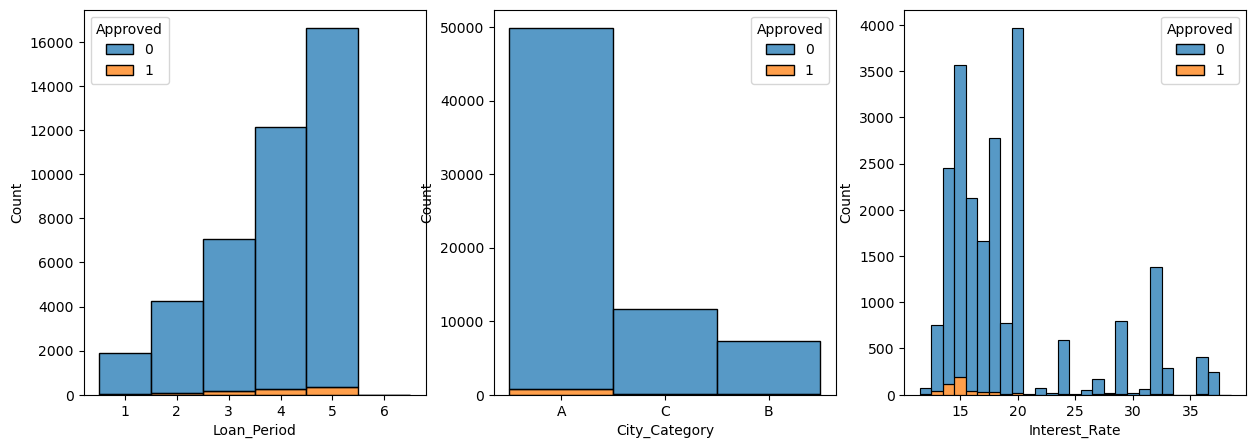

In [12]:
d1=sales_train.melt(id_vars="Approved")
data1=sales_train[['Loan_Period','City_Category','Interest_Rate']]
fig , ax=plt.subplots(nrows = 1, ncols = 3, figsize=(15,5))
for variable, subplot in zip(data1, ax.flatten()):
        sns.histplot(x=sales_train[variable],data=d1, ax = subplot,hue=sales_train.Approved,discrete=True, multiple='stack')
plt.show()

# FROM THE ABOVE PLOTS WE CAN UNDERSTAND THAT 
# 1) MAXIMUM NUMBERS OF LOAND WERE TAKEN OPTING 5 YEARS AS THE LOAN PERIOD AND THEN FOLLOWED BY 4 & 3 YEARS
# 2) PEOPLE FROM A CATEGORY CITY ARE MAJORLY OPTING FOR LOANS WHERE B CATEGORY CITY PEOPLE ARE OPTING LESS NUMBER OF LOANS
# 3) LOANS WITH 20% INTREST RATE ARE MAJORLY BEING APPLIED WHERE LOANS WITH 15% INTREST RATE ARE BEING MAJORLY APPROVED

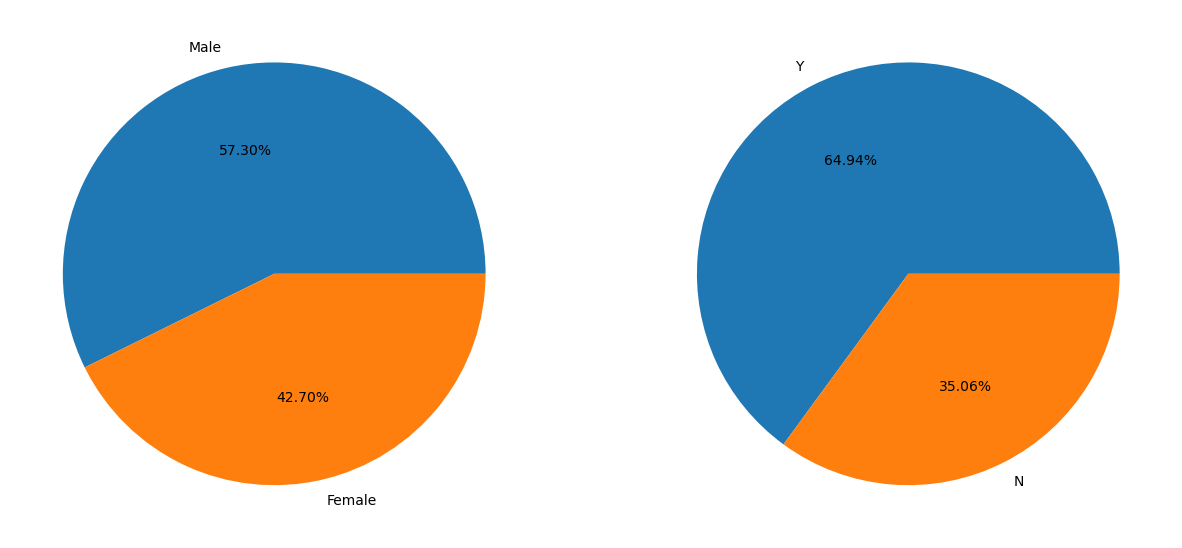

In [13]:
data1=sales_train.Gender.value_counts()
data2=sales_train.Contacted.value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,15))
ax1.pie(data1,autopct="%1.2f%%",labels=data1.index)
ax2.pie(data2,autopct="%1.2f%%",labels=data2.index)
plt.show()

# DATA PRE PROCESSING

In [85]:
sales_test["Approved"]="test"

In [86]:
combined_sales=pd.concat([sales_train,sales_test],axis=0)

In [87]:
combined_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99750 entries, 0 to 30036
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   99750 non-null  object 
 1   Gender                               99750 non-null  object 
 2   DOB                                  99732 non-null  object 
 3   Lead_Creation_Date                   99750 non-null  object 
 4   City_Code                            98622 non-null  object 
 5   City_Category                        98622 non-null  object 
 6   Employer_Code                        94127 non-null  object 
 7   Employer_Category1                   94127 non-null  object 
 8   Employer_Category2                   93757 non-null  float64
 9   Monthly_Income                       99750 non-null  float64
 10  Customer_Existing_Primary_Bank_Code  86322 non-null  object 
 11  Primary_Bank_Type           

In [88]:
combined_sales.isnull().sum().sort_values(ascending=False)/combined_sales.shape[0]

EMI                                    0.679920
Interest_Rate                          0.679920
Loan_Period                            0.396792
Loan_Amount                            0.396792
Primary_Bank_Type                      0.134617
Customer_Existing_Primary_Bank_Code    0.134617
Employer_Category2                     0.060080
Employer_Code                          0.056371
Employer_Category1                     0.056371
City_Code                              0.011308
City_Category                          0.011308
Existing_EMI                           0.000832
DOB                                    0.000180
Var1                                   0.000000
ID                                     0.000000
Source_Category                        0.000000
Source                                 0.000000
Contacted                              0.000000
Gender                                 0.000000
Monthly_Income                         0.000000
Lead_Creation_Date                     0

In [89]:
objectcols=combined_sales.select_dtypes(include="object")
numericcols=combined_sales.select_dtypes(include=np.number)

In [90]:
numericcols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99750 entries, 0 to 30036
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Employer_Category2  93757 non-null  float64
 1   Monthly_Income      99750 non-null  float64
 2   Existing_EMI        99667 non-null  float64
 3   Loan_Amount         60170 non-null  float64
 4   Loan_Period         60170 non-null  float64
 5   Interest_Rate       31928 non-null  float64
 6   EMI                 31928 non-null  float64
 7   Var1                99750 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 6.8 MB


In [91]:
numericcols.isnull().sum().sort_values(ascending=False)/numericcols.shape[0]

Interest_Rate         0.679920
EMI                   0.679920
Loan_Amount           0.396792
Loan_Period           0.396792
Employer_Category2    0.060080
Existing_EMI          0.000832
Monthly_Income        0.000000
Var1                  0.000000
dtype: float64

In [92]:
from sklearn.experimental import enable_iterative_imputer

In [93]:
from sklearn.impute import IterativeImputer

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
imputer=IterativeImputer(estimator=DecisionTreeRegressor(),initial_strategy="mean",max_iter=10)

In [25]:
numericcols_impute=imputer.fit_transform(numericcols)

In [26]:
numericcols_impute=pd.DataFrame(numericcols_impute,columns=numericcols.columns)

In [27]:
numericcols_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99750 entries, 0 to 99749
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Employer_Category2  99750 non-null  float64
 1   Monthly_Income      99750 non-null  float64
 2   Existing_EMI        99750 non-null  float64
 3   Loan_Amount         99750 non-null  float64
 4   Loan_Period         99750 non-null  float64
 5   Interest_Rate       99750 non-null  float64
 6   EMI                 99750 non-null  float64
 7   Var1                99750 non-null  float64
dtypes: float64(8)
memory usage: 6.1 MB


In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
scaler=StandardScaler()

In [96]:
numericcols_scaled=scaler.fit_transform(numericcols_impute)

In [97]:
numericcols_scaled=pd.DataFrame(numericcols_scaled,columns=numericcols_impute.columns[0:8])

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
numericcols["Approved"]=objectcols.Approved


In [34]:
objectcols=objectcols.drop("Approved",axis=1)

In [35]:
original=objectcols

In [36]:
mask=objectcols.isnull()

In [37]:
objectcols=objectcols.astype(str).apply(LabelEncoder().fit_transform)

In [38]:
objectcols=objectcols.where(~mask,original)

In [39]:
objectcols.isnull().sum().sort_values(ascending=False)

Customer_Existing_Primary_Bank_Code    13428
Primary_Bank_Type                      13428
Employer_Code                           5623
Employer_Category1                      5623
City_Code                               1128
City_Category                           1128
DOB                                       18
ID                                         0
Gender                                     0
Lead_Creation_Date                         0
Contacted                                  0
Source                                     0
Source_Category                            0
dtype: int64

In [40]:
objectcols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99750 entries, 0 to 30036
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   99750 non-null  int64 
 1   Gender                               99750 non-null  int64 
 2   DOB                                  99732 non-null  object
 3   Lead_Creation_Date                   99750 non-null  int64 
 4   City_Code                            98622 non-null  object
 5   City_Category                        98622 non-null  object
 6   Employer_Code                        94127 non-null  object
 7   Employer_Category1                   94127 non-null  object
 8   Customer_Existing_Primary_Bank_Code  86322 non-null  object
 9   Primary_Bank_Type                    86322 non-null  object
 10  Contacted                            99750 non-null  int64 
 11  Source                               9975

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
imputer1=IterativeImputer(estimator=DecisionTreeClassifier(),initial_strategy="most_frequent",max_iter=10)

In [43]:
objectcols_impute=imputer.fit_transform(objectcols)

C:\Users\sadin\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [44]:
objectcols_impute=pd.DataFrame(objectcols_impute,columns=objectcols.columns)

In [45]:
objectcols_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99750 entries, 0 to 99749
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   99750 non-null  float64
 1   Gender                               99750 non-null  float64
 2   DOB                                  99750 non-null  float64
 3   Lead_Creation_Date                   99750 non-null  float64
 4   City_Code                            99750 non-null  float64
 5   City_Category                        99750 non-null  float64
 6   Employer_Code                        99750 non-null  float64
 7   Employer_Category1                   99750 non-null  float64
 8   Customer_Existing_Primary_Bank_Code  99750 non-null  float64
 9   Primary_Bank_Type                    99750 non-null  float64
 10  Contacted                            99750 non-null  float64
 11  Source                      

In [79]:
combined_sales_clean=pd.concat([objectcols_impute,numericcols_scaled],axis=1)

In [80]:
combined_sales_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99750 entries, 0 to 99749
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   99750 non-null  float64
 1   Gender                               99750 non-null  float64
 2   DOB                                  99750 non-null  float64
 3   Lead_Creation_Date                   99750 non-null  float64
 4   City_Code                            99750 non-null  float64
 5   City_Category                        99750 non-null  float64
 6   Employer_Code                        99750 non-null  float64
 7   Employer_Category1                   99750 non-null  float64
 8   Customer_Existing_Primary_Bank_Code  99750 non-null  float64
 9   Primary_Bank_Type                    99750 non-null  float64
 10  Contacted                            99750 non-null  float64
 11  Source                      

In [81]:
combined_sales_clean=combined_sales_clean.reset_index()

In [82]:
numericcols=numericcols.reset_index()

In [83]:
combined_sales_clean["Approved"]=numericcols.Approved

In [100]:
combined_sales_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99750 entries, 0 to 99749
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   index                                99750 non-null  int64  
 1   ID                                   99750 non-null  float64
 2   Gender                               99750 non-null  float64
 3   DOB                                  99750 non-null  float64
 4   Lead_Creation_Date                   99750 non-null  float64
 5   City_Code                            99750 non-null  float64
 6   City_Category                        99750 non-null  float64
 7   Employer_Code                        99750 non-null  float64
 8   Employer_Category1                   99750 non-null  float64
 9   Customer_Existing_Primary_Bank_Code  99750 non-null  float64
 10  Primary_Bank_Type                    99750 non-null  float64
 11  Contacted                   

In [101]:
train_clean=combined_sales_clean[combined_sales_clean.Approved!="test"]
test_clean=combined_sales_clean[combined_sales_clean.Approved=="test"]

In [102]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69713 entries, 0 to 69712
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   index                                69713 non-null  int64  
 1   ID                                   69713 non-null  float64
 2   Gender                               69713 non-null  float64
 3   DOB                                  69713 non-null  float64
 4   Lead_Creation_Date                   69713 non-null  float64
 5   City_Code                            69713 non-null  float64
 6   City_Category                        69713 non-null  float64
 7   Employer_Code                        69713 non-null  float64
 8   Employer_Category1                   69713 non-null  float64
 9   Customer_Existing_Primary_Bank_Code  69713 non-null  float64
 10  Primary_Bank_Type                    69713 non-null  float64
 11  Contacted                   

In [103]:
train_clean=train_clean.drop(["index","ID","DOB"],axis=1)

In [104]:
# split data for model building
y=train_clean.Approved
X=train_clean.drop("Approved",axis=1)

In [105]:
y=y.astype("int64")

In [106]:
y.value_counts()

0    68693
1     1020
Name: Approved, dtype: int64

<AxesSubplot: >

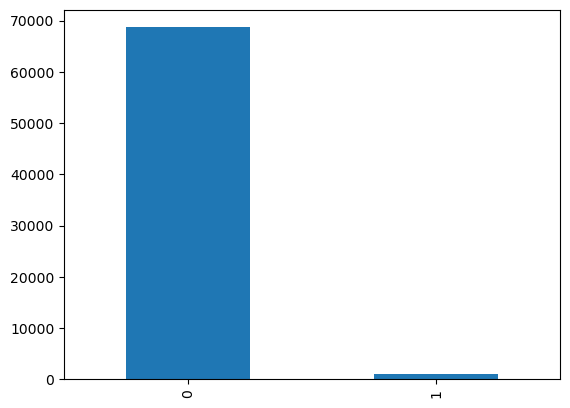

In [107]:
y.value_counts().plot(kind="bar") # imbalance data

In [108]:
from imblearn.over_sampling import BorderlineSMOTE

In [109]:
smote_border = BorderlineSMOTE(random_state = 42, kind = 'borderline-2')
X_smoteborder, y_smoteborder = smote_border.fit_resample(
X,y)

In [110]:
y_smoteborder.value_counts()

0    68693
1    68693
Name: Approved, dtype: int64

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
logit=LogisticRegression(max_iter=3000)

In [113]:
logitmodel=logit.fit(X_smoteborder,y_smoteborder)

In [114]:
logitmodel.score(X_smoteborder,y_smoteborder)

0.7338011151063427

In [154]:
logitpredict=logitmodel.predict(X_smoteborder)

In [155]:
print(classification_report(y_smoteborder,logitpredict))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73     68693
           1       0.73      0.75      0.74     68693

    accuracy                           0.73    137386
   macro avg       0.73      0.73      0.73    137386
weighted avg       0.73      0.73      0.73    137386



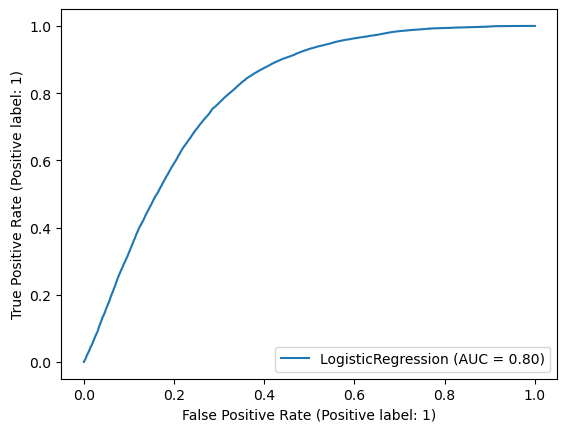

In [156]:
RocCurveDisplay.from_estimator(logit,X_smoteborder,y_smoteborder)

In [118]:
from sklearn.tree import DecisionTreeClassifier

In [119]:
tree=DecisionTreeClassifier(max_depth=8)

In [120]:
treemodel=tree.fit(X_smoteborder,y_smoteborder)

In [121]:
treemodel.score(X_smoteborder,y_smoteborder)

0.9328534202902771

In [157]:
treepredict=treemodel.predict(X_smoteborder)

In [158]:
print(classification_report(y_smoteborder,treepredict))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     68693
           1       0.94      0.92      0.93     68693

    accuracy                           0.93    137386
   macro avg       0.93      0.93      0.93    137386
weighted avg       0.93      0.93      0.93    137386



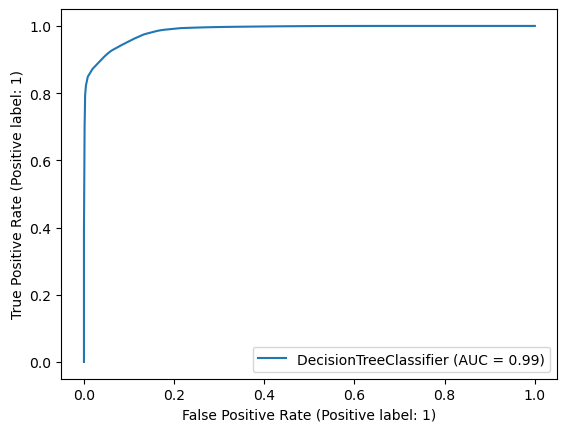

In [159]:
RocCurveDisplay.from_estimator(tree,X_smoteborder,y_smoteborder)

In [125]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTEN
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import KMeansSMOTE

In [126]:
#random over sampling
random_os = RandomOverSampler(random_state = 42)
X_random, y_random = random_os.fit_resample(X,y)

In [127]:
print(y.value_counts())
print(y_random.value_counts())

0    68693
1     1020
Name: Approved, dtype: int64
0    68693
1    68693
Name: Approved, dtype: int64


SMOTEN

In [128]:
smote_os = SMOTEN(random_state = 42)
X_smote, y_smote = smote_os.fit_resample(X,y)

In [129]:
print(y.value_counts())
print(y_smote.value_counts())

0    68693
1     1020
Name: Approved, dtype: int64
0    68693
1    68693
Name: Approved, dtype: int64


SVMSMOTE

In [130]:
smote_svm = SVMSMOTE(random_state = 42)
X_smotesvm, y_smotesvm = smote_svm.fit_resample(X,y)

In [131]:
print(y.value_counts())
print(y_smotesvm.value_counts())

0    68693
1     1020
Name: Approved, dtype: int64
0    68693
1    38237
Name: Approved, dtype: int64


# LOGISTIC REGRESSION

In [150]:
logit1=LogisticRegression(max_iter=2000)

In [151]:
random_logitmodel=logit1.fit(X_random,y_random)

In [152]:
random_logitmodel.score(X_random,y_random)

0.7189669980929644

In [153]:
randompredict=random_logitmodel.predict(X_random)

In [160]:
print(classification_report(y_random,randompredict))

              precision    recall  f1-score   support

           0       0.73      0.70      0.71     68693
           1       0.71      0.74      0.73     68693

    accuracy                           0.72    137386
   macro avg       0.72      0.72      0.72    137386
weighted avg       0.72      0.72      0.72    137386



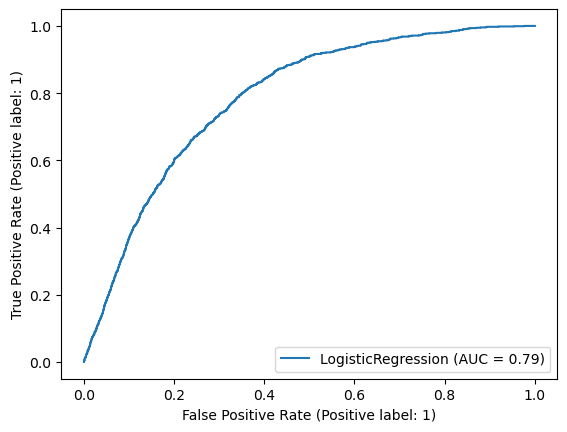

In [161]:
RocCurveDisplay.from_estimator(logit1,X_random,y_random)

In [162]:
smote_model=logit1.fit(X_smote,y_smote)

In [164]:
smote_model.score(X_smote,y_smote)

0.9037019783675192

In [166]:
smotepredict=smote_model.predict(X_smote)

In [167]:
print(classification_report(y_smote,smotepredict))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90     68693
           1       0.89      0.92      0.91     68693

    accuracy                           0.90    137386
   macro avg       0.90      0.90      0.90    137386
weighted avg       0.90      0.90      0.90    137386



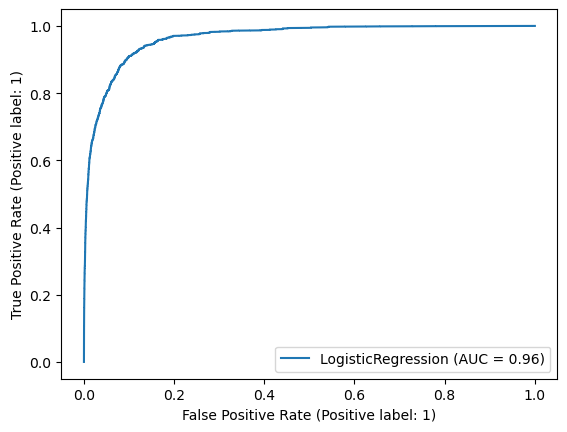

In [168]:
RocCurveDisplay.from_estimator(logit1,X_smote,y_smote)

In [169]:
svmsmote_model=logit1.fit(X_smotesvm,y_smotesvm)

In [170]:
svmsmote_model.score(X_smotesvm,y_smotesvm)

0.7551575797250538

In [171]:
svmpredict=svmsmote_model.predict(X_smotesvm)

In [172]:
print(classification_report(y_smotesvm,svmpredict))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81     68693
           1       0.66      0.64      0.65     38237

    accuracy                           0.76    106930
   macro avg       0.73      0.73      0.73    106930
weighted avg       0.75      0.76      0.75    106930



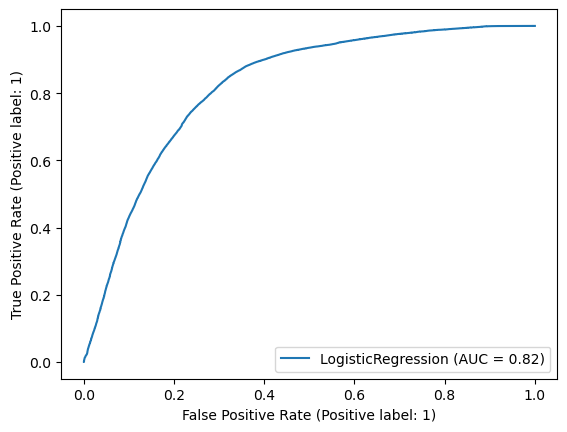

In [173]:
RocCurveDisplay.from_estimator(logit1,X_smotesvm,y_smotesvm)

# DECISION TREE

In [188]:
tree1=DecisionTreeClassifier(max_depth=15)

In [189]:
random_tree=tree1.fit(X_random,y_random)

In [190]:
random_tree.score(X_random,y_random)

0.9280276010656108

In [191]:
random_tree_predict=random_tree.predict(X_random)

In [192]:
print(classification_report(y_random,random_tree_predict))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92     68693
           1       0.88      0.99      0.93     68693

    accuracy                           0.93    137386
   macro avg       0.94      0.93      0.93    137386
weighted avg       0.94      0.93      0.93    137386



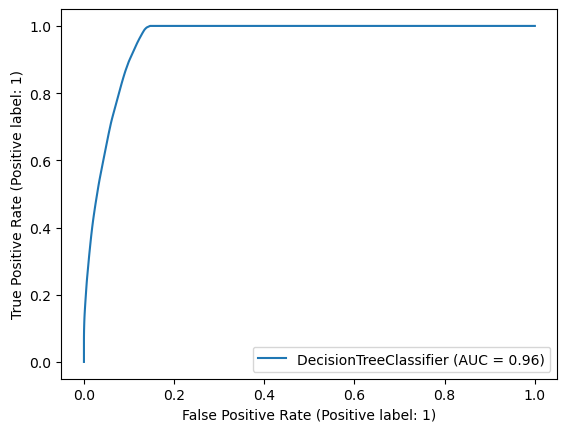

In [193]:
RocCurveDisplay.from_estimator(tree1,X_random,y_random)

In [201]:
tree2=DecisionTreeClassifier(max_depth=5)

In [202]:
smote_tree=tree2.fit(X_smote,y_smote)

In [203]:
smote_tree.score(X_smote,y_smote)

0.9117304528845734

In [204]:
smote_tree_predict=smote_tree.predict(X_smote)

In [205]:
print(classification_report(y_smote,smote_tree_predict))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     68693
           1       0.90      0.93      0.91     68693

    accuracy                           0.91    137386
   macro avg       0.91      0.91      0.91    137386
weighted avg       0.91      0.91      0.91    137386



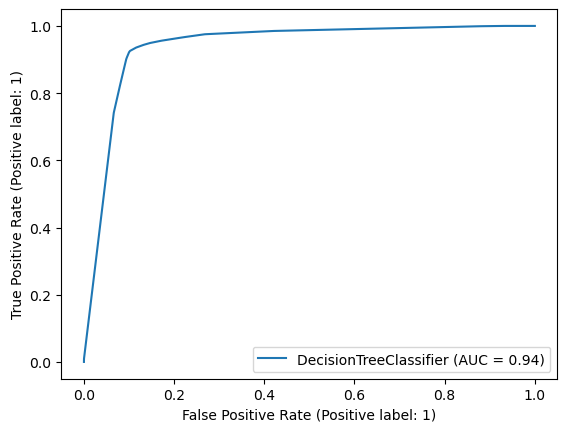

In [206]:
RocCurveDisplay.from_estimator(tree2,X_smote,y_smote)

In [210]:
tree3=DecisionTreeClassifier(max_depth=8)

In [211]:
svm_tree=tree3.fit(X_smotesvm,y_smotesvm)

In [212]:
svm_tree.score(X_smotesvm,y_smotesvm)

0.9423641634714299

In [213]:
svm_tree_predict=svm_tree.predict(X_smotesvm)

In [214]:
print(classification_report(y_smotesvm,svm_tree_predict))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     68693
           1       0.92      0.92      0.92     38237

    accuracy                           0.94    106930
   macro avg       0.94      0.94      0.94    106930
weighted avg       0.94      0.94      0.94    106930



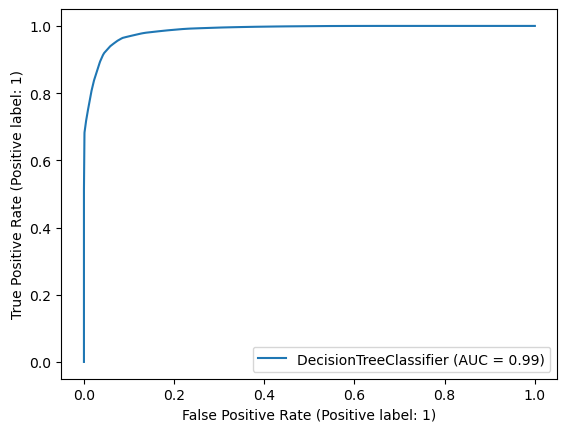

In [215]:
RocCurveDisplay.from_estimator(tree3,X_smotesvm,y_smotesvm)